#### What are Outliers?
- Exceptionally far from the mainstream of the data.
- Outliers can have many causes
    - Measurement or input error
    - Data corruption.
    - True outliers.

- There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not. 

- A good tip is to consider plotting the identified outlier values, perhaps in the context of non-outlier values to see if there are any systematic relationship or pattern to the outliers. If there is, perhaps they are not outliers and can be explained, or perhaps the outliers themselves can be identified more systematically.

##### Standard deviation method
- **Gaussian distribution**: The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.
    - For example, within one standard deviation of the mean will cover 68 percent of the data.
         - So, if the mean is 50 and the standard deviation is 5, then all data in the sample between 45 and 55 will account for about 68 percent of the data sample.
    
    - **1 Standard Deviation from the Mean**: 68 percent.
    - **2 Standard Deviations from the Mean**: 95 percent. 
    - **3 Standard Deviations from the Mean**: 99.7 percent.
    - **4 Standard Deviations from the Mean**: 99.99 percent.  

    - Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution.  

    - **For smaller samples** of data, perhaps a value of **2 standard deviations** (95 percent) can be used, and **for larger samples**, perhaps a value of **4 standard deviations** (99.9 percent) can be used.  
    


In [ ]:
# Generate a dataset with Gaussian distribution for experiment.

# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.088 stdv=8.989


**identify the outlier with standard deviation method.**

In [4]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# Generate a dataset with Gaussian distribution for experiment.
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)

# define outliers (3 standard deviation)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


- As this is a single variable dataset we are putting a upper bound and lower bound on the data.
- data with multiple variables, each with a different Gaussian distribution. You can imagine bounds in two dimensions that would define an ellipse if you have two variables. 
    - Observations that fall outside of the ellipse would be considered outliers.
    - In three dimensions, this would be an ellipsoid, and so on into higher dimensions. 
    

#### Interquartile Range Method
- Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.
- A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.
- The IQR is the difference between the 75th and 25th percentiles of the data, and can be used as a measure of the spread of the data. (you can plot box and whisker plot to see the IQR)
- Remember that percentiles can be calculated by sorting the observations and selecting values at specific indices.
-  If we had 10,000 samples, then the 50th percentile would be the average of the 5000th and 5001st values.
- The IQR defines the middle 50 percent of the data, or the body of the data.
- The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile.
- **The common value for the factor k is the value 1.5**. A factor k of 3 or more can be used to identify values that are extreme outliers or far outs when described in the context of box and whisker plots.



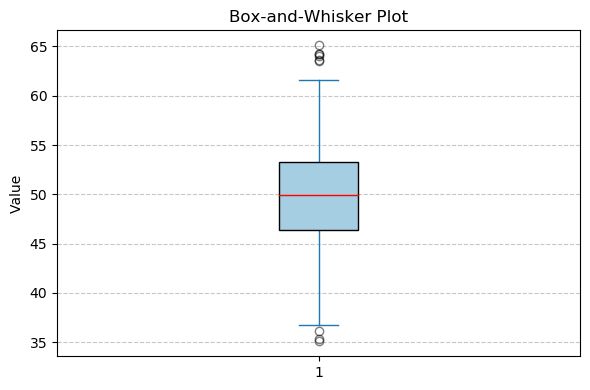

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randn(1000) * 5 + 50   # e.g., N(μ=50, σ=5)

# -------------------------------------------------
# Box‑and‑whisker plot
# -------------------------------------------------
plt.figure(figsize=(6, 4))
plt.boxplot(data,
            vert=True,          # vertical box
            patch_artist=True,  # fill with color
            boxprops=dict(facecolor="#a6cee3"),
            medianprops=dict(color="red"),
            whis=1.5, # default value is 1.5, whis line length will be 1.5 * IQR
            whiskerprops=dict(color="#1f78b4"),
            capprops=dict(color="#1f78b4"),
            flierprops=dict(marker='o', color="#e31a1c", alpha=0.5))

plt.title("Box‑and‑Whisker Plot")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# prepare dataset
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50


# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


#### Automatic Outlier Detection using LocalOutlierFactor() class of sklearn

- A simple approach to identifying outliers is to locate those examples that are far from the other examples in the multi-dimensional feature space. 
- This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.
- **The local outlier factor, or LOF for short**, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. 
    - Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood.
    - Those examples with the largest score are more likely to be outliers.

In [ ]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('./data/housing.csv', header=None)

# retrieve the array
data = df.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train) # each index of yhat will be -1 for outliers and 1 for inliers

# select all rows that are not outliers
mask = yhat != -1 # mask is an array of boolean values where True means the example is an inlier
X_train, y_train = X_train[mask, :], y_train[mask] 

# summarize the shape of the updated training dataset, 34 rows removed
print(X_train.shape, y_train.shape)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356
